# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

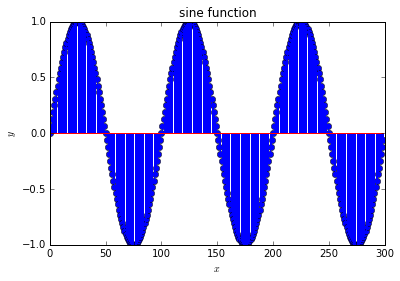

In [2]:
def sin_fn(freq, perio):
   t = np.arange(0, perio, 0.01)
   s=np.sin(2*np.pi*freq*t)
   return s

plt.stem(sin_fn(1, 3))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('sine function')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

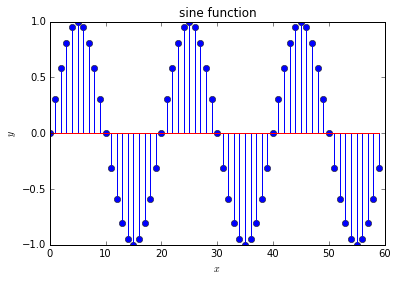

In [5]:
def sin_fn_samp(freq, perio, samp_fr):
   x= np.arange(0, perio, 1./samp_fr)
   s=np.sin(2*np.pi*freq*x)
   return s

plt.stem(sin_fn_samp(1, 3, 20))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('sine function')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]


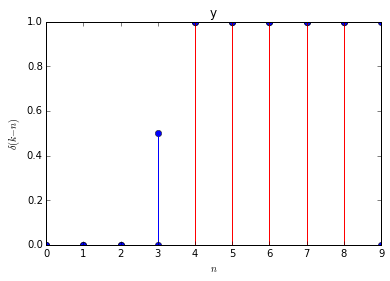

In [6]:
def step(n=0, N=20):
    if n>(N-1):
        raise ValueError ('n should be infrior to N-1')
    s=np.zeros((N, ))
    for i in range(n,N):
        s[i]=1;
    print s
    return s
N = 10
y=np.zeros((N,))

s = step(4,N)
for i in range (0, N-1):
    y[i] =(s[i]+s[i+1])/2

plt.stem(y)
plt.stem (s, 'r')
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-n)$')
plt.title('y')


        
    


**1.2** Propose a modification to obtain a causal version

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]


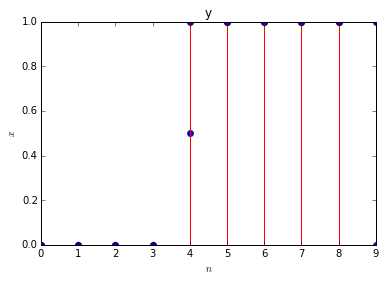

In [11]:
def step(n=0, N=20):
    if n>(N-1):
        raise ValueError ('n should be infrior to N-1')
    s=np.zeros((N, ))
    for i in range(n,N):
        s[i]=1;
    print s
    return s
N = 10
y=np.zeros((N,))

s = step(4,N)
for i in range (1, N-1):
    y[i] =(s[i]+s[i-1])/2

plt.stem(y)
plt.stem (s, 'r')
plt.xlabel(r'$n$')
plt.ylabel(r'$x$')
plt.title('y')

Comments on your observations

In [ ]:
Casual system can be depended only from present meaning and past, 
so for do our system casual we have not use ant future sygnals.

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [33]:
def prim (k, f):
    sum = 0
    n=np.zeros(k)
    if k > len(f): raise ValueError ('k should be infrior to N-1')
    for i in range (0, (k)):
        sum += f[i]
        n[i]=sum
    return n    
    

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


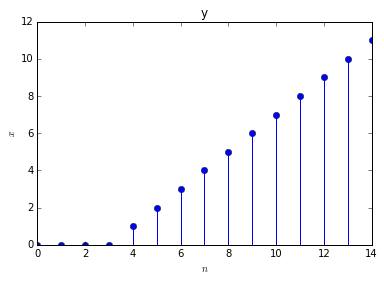

In [34]:
s = step (4)
sp = prim (15,s)
plt.stem (sp)
plt.xlabel(r'$n$')
plt.ylabel(r'$x$')
plt.title('y')

In [ ]:
This operatare is not stable becouse it increase with each step

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

<Container object of 3 artists>

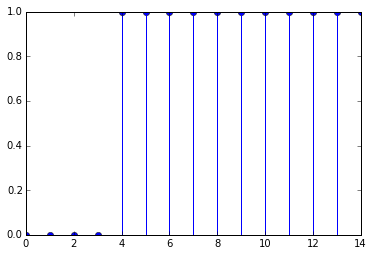

In [39]:
def dirac(n=0, N=20):
    if n > N-1: raise ValueError('n is out of range')
    s = np.zeros((N))
    s[n] = 1
    return s
dirc = dirac(4,20)
prd = prim(15, dirc)
plt.stem(prd)

In [ ]:
Stable system (stabilesed in 1.0)

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

<Container object of 3 artists>

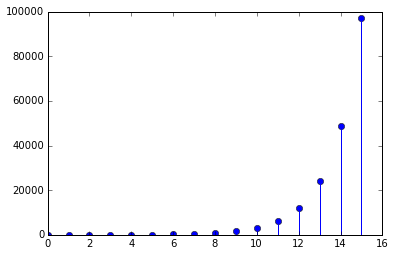

In [5]:
xk=[1,2,3,4,5,6,7,8,7,6,4,2,1,3,5,9]
y = np.zeros(len(xk))
for i in range (1, len(xk)):
    y[i]=xk[i]+2*y[i-1]
plt.stem(y)



In [ ]:
As we can see system is not stable becouse our system is increasing

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

<Container object of 3 artists>

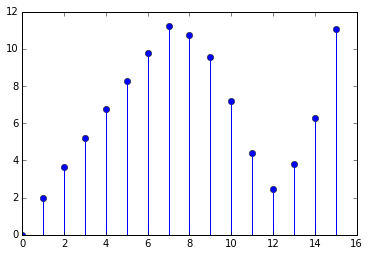

In [6]:
y = np.zeros(len(xk))
for i in range (1, len(xk)):
    y[i]=xk[i]+y[i-1]/3
plt.stem(y)

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


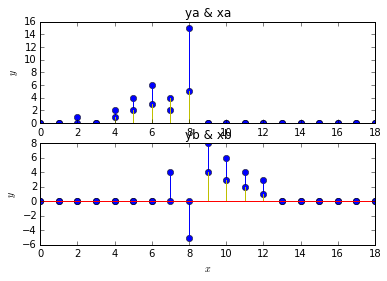

In [7]:
xa = np.array ([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
xb = np.array ([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0])
x = xa+xb
N = 19
ya = np.zeros((N, ))
for idx, i  in enumerate(np.arange(1,(N-1))):
    ya[idx] = 3*xa[i-1] - 2*xa[i] + xa[i+1]

yb = np.zeros((N, ))
for idx, i  in enumerate(np.arange (1,N-1)):
    yb[idx] = 3*xb[i-1] - 2*xb[i] + xb[i+1]
y= np.zeros ((N, ))
for idx, i  in enumerate(np.arange (1,N-1)):
    y[idx] = 3*x[i-1] - 2*x[i] + x[i+1]

    
plt.figure(1)
plt.subplot(211)

plt.stem (ya, 'b')
plt.stem(xa, 'y')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('ya & xa')  

plt.subplot(212)
plt.stem (yb, 'b')
plt.stem(xb, 'y')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('yb & xb') 



    

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]


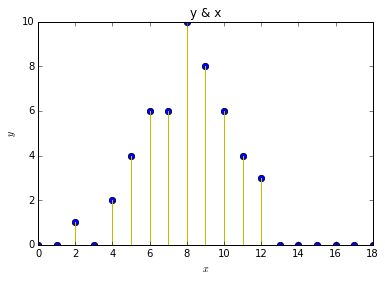

In [9]:
print y -(ya+yb)
plt.stem (y, 'b')
plt.stem(yb+ya, 'y')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('y & x')  



In [ ]:
As we see our system is linear and invariant.

**3.3** Propose a nonlinear/noninvariant system.

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.28000000e+02   1.42200000e+03   6.49800000e+03   2.61480000e+04
   9.82800000e+04   2.36076000e+05   5.31342000e+05   1.06281000e+06
   1.59428400e+06   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


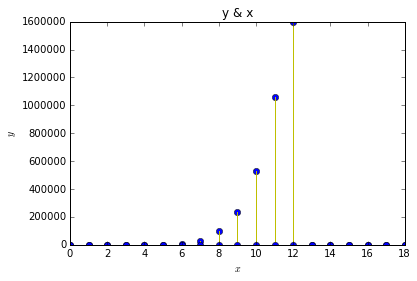

In [8]:
yz1 = np.zeros((N, ))
for idx, i  in enumerate(np.arange (1,N-1)):
    yz1[idx] = 3*i*xa[i-1] 
yz2 = np.zeros((N, ))
for idx, i  in enumerate(np.arange (1,N-1)):
    yz2[idx] = 3*i*xb[i-1] 
yz= np.zeros ((N, ))
for idx, i  in enumerate(np.arange (1,N-1)):
    yz[idx] = 3**i*x[i-1] 
print yz -(yz1+yz2)
plt.stem (yz, 'y')
plt.stem(yz1+yz2, 'b')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('y & x') 

In [ ]:
we can se that this system is nonlinear/noninvarian